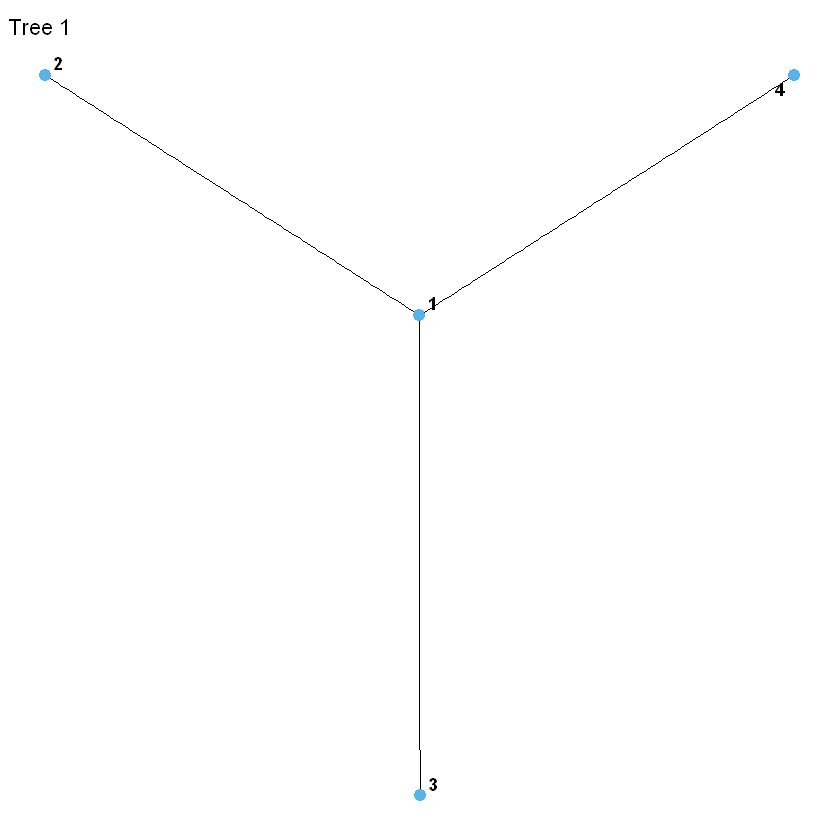

In [1]:
library(rvinecopulib)

df <- read.csv("C:\\Users\\TJR\\Documents\\Projects\\statarb\\statarb\\scrap_book\\train\\returns.csv")
df <- df[, !(colnames(df) %in% c("Date"))]

u <- pseudo_obs(df)

cvine <- cvine_structure(4:1)
plot(cvine)

In [2]:
fit <- vine(u, copula_controls = list(structure = cvine))
print(summary(fit))

$margins
# A data.frame: 4 x 6 
 margin name nobs   bw loglik d.f.
      1  AAL  249 0.28    -25  2.8
      2  UAL  249 0.28    -25  2.8
      3  DAL  249 0.28    -25  2.8
      4  LUV  249 0.28    -25  2.8

$copula
# A data.frame: 6 x 11 
 tree edge conditioned conditioning var_types family rotation   parameters df
    1    1        4, 1                    c,c    tll        0 [30x30 grid] 16
    1    2        3, 1                    c,c    tll        0 [30x30 grid] 17
    1    3        2, 1                    c,c    bb7      180    4.4, 10.2  2
    2    1        4, 2            1       c,c    bb8      180   1.85, 0.86  2
    2    2        3, 2            1       c,c  frank        0        -0.66  1
    3    1        4, 3         2, 1       c,c gumbel      180          1.8  1
    tau loglik
  0.371  153.0
  0.572  190.5
  0.808  345.6
  0.203   13.0
 -0.073    1.5
  0.439   52.7



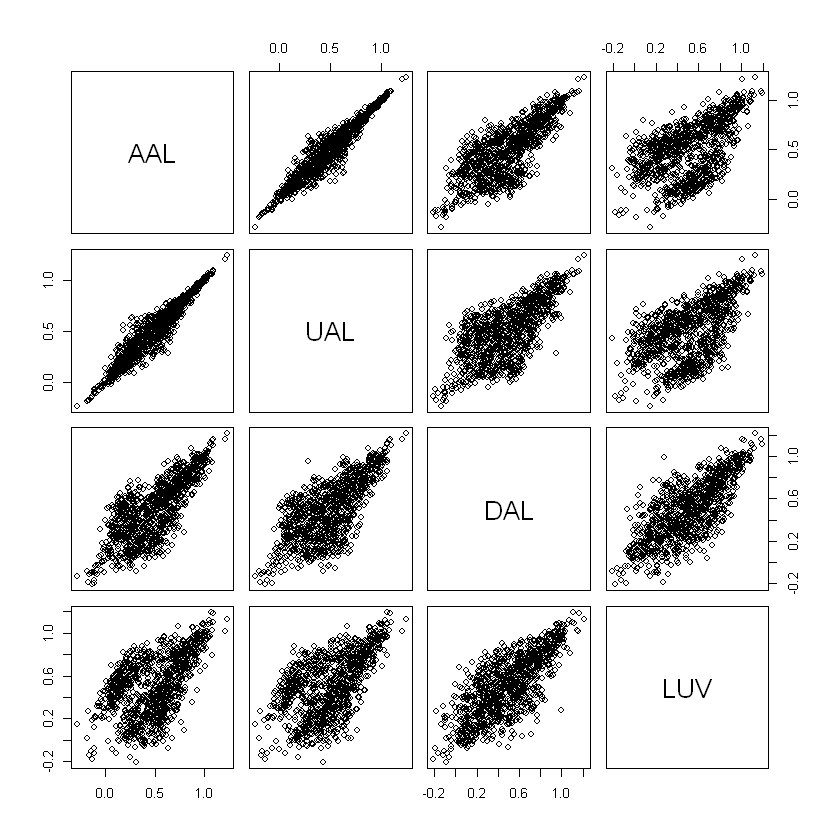

In [3]:
r <- rvine(1000, fit)
pairs(r)

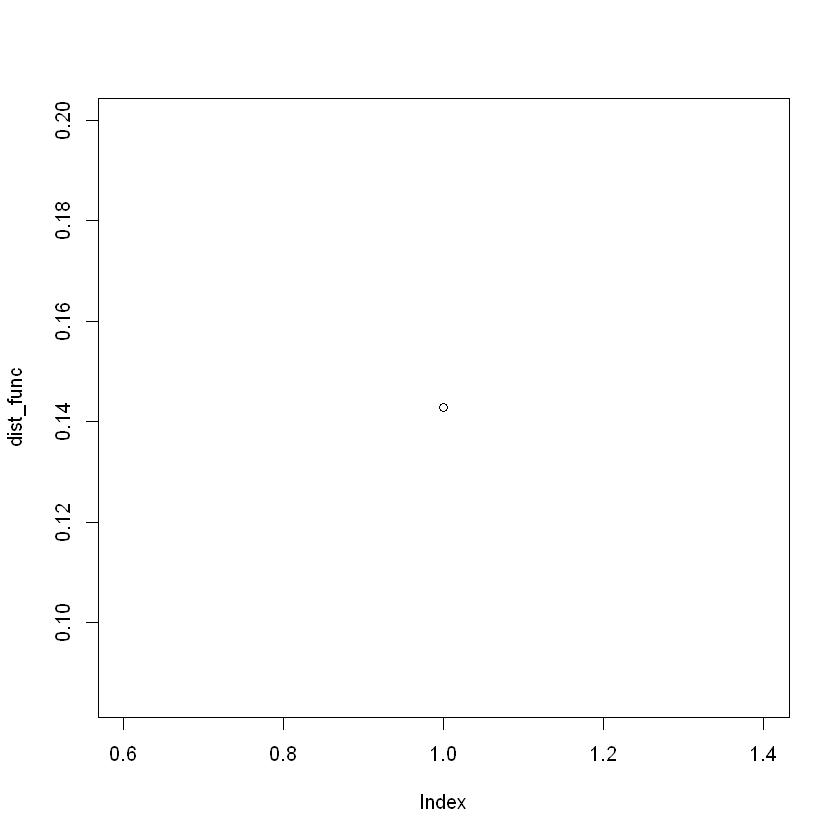

In [4]:
dist_func = pvine(r[2, ], fit, n_mc = 10^4)
plot(dist_func)

       AAL        UAL        DAL        LUV 
0.26526523 0.28464467 0.05326597 0.16556114 
[1] 16.57137


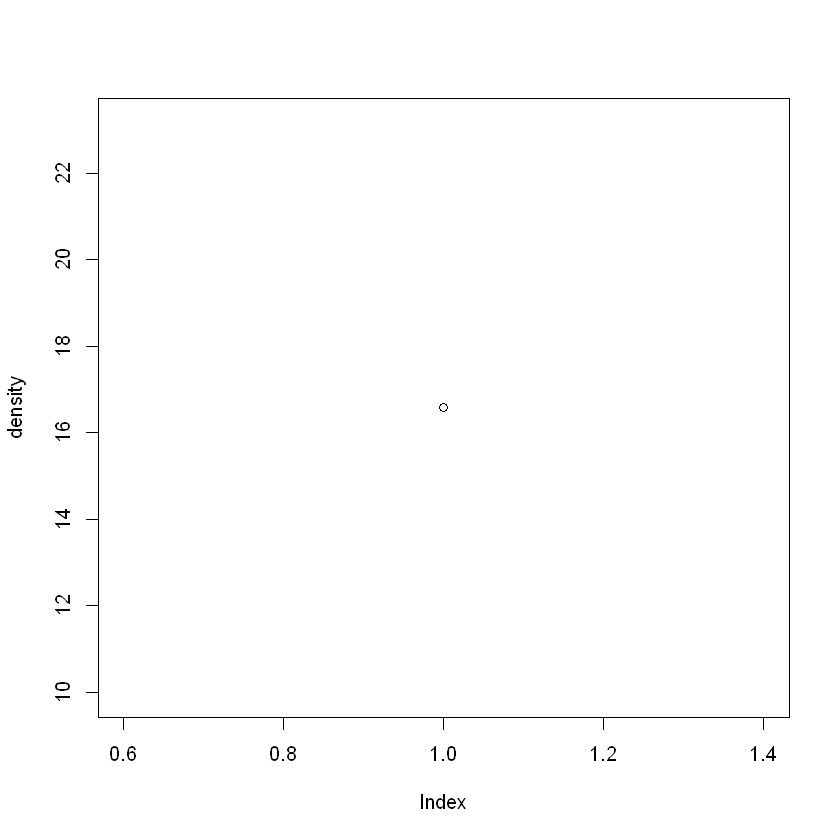

In [5]:
density = dvine(r[1, ], fit)
print(r[1, ])
plot(density)
print(density)

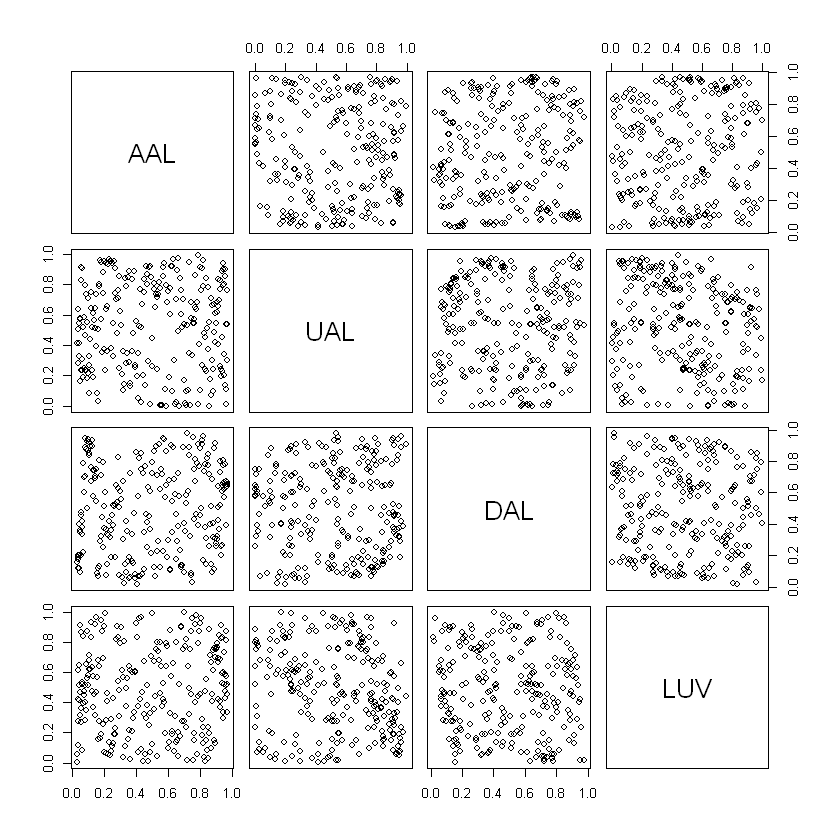

In [7]:
ur <- rosenblatt(u, fit)
pairs(ur)

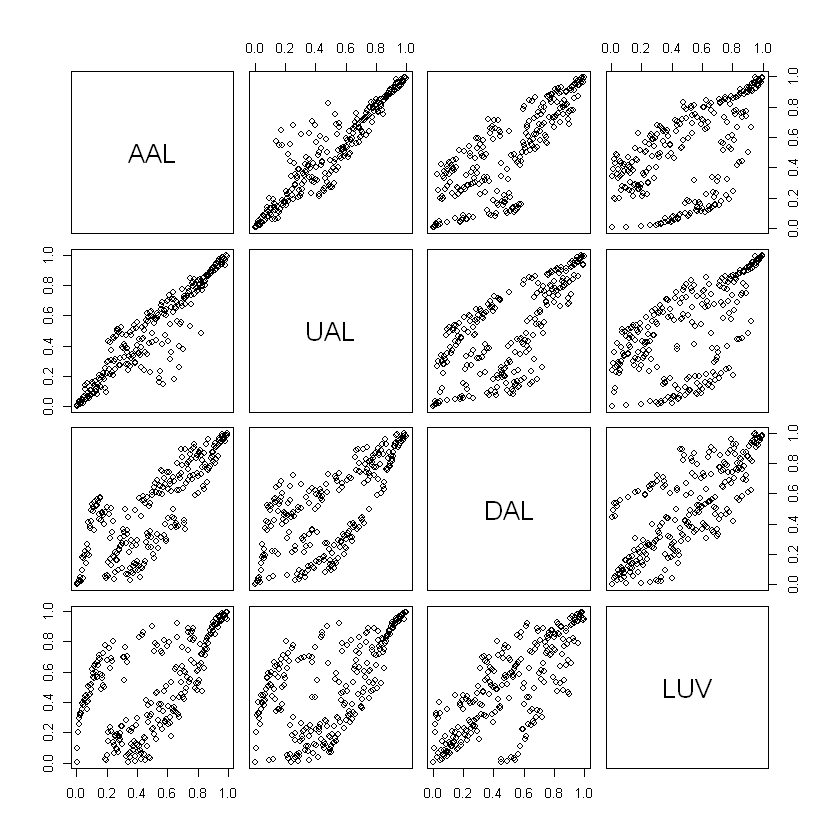

In [8]:
inv_ur = inverse_rosenblatt(ur, fit)
pairs(inv_ur)